In [2]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import math
%matplotlib inline

### Напишем функцию, которая по заданным параметрам $\theta$ и $k$ будет выдавать массив с оценкой $\sqrt[k]{ \frac{k!}{\bar{X}^k}}$, для всех $n \leq N = 10^4$

In [3]:
# Функция принимает параметр экспоненциального распределения, показатель корня в оценке и размер выборки.
def count_estimination(theta, k, n=10**4):
    # Создаем распределение.
    x = stats.expon(scale=1 / theta)
    # Генерируем выборку.
    sample = x.rvs(n)
    k_factorial = math.factorial(k)
    # Подсчет выборочного k-го момента динамикой.
    cur_sum = 0
    x_mean = []
    for i in range(sample.size):
        cur_sum += sample[i] ** k
        x_mean.append(cur_sum / (i+1))
    
    # Возвращаем оценку.    
    return np.array(list(map(lambda x: pow(k_factorial/x ,1 / k), x_mean)))
    

In [15]:
# Функция для построения графиков для оценки.
# Второй параметр, это ограничение по оси ординат.
def get_estim_plt(theta, k, n=10**4, ylim = 5):
    # Координаты для оси абсцисс.
    n_arr = range(1,n + 1)
    # Считаем оценку.
    estimination = count_estimination(theta, k, n)
    plt.figure(figsize=(7, 5))
    plt.xlabel("n")
    plt.ylabel(r"abs difference")
    plt.plot(n_arr, abs(estimination - theta), color='b', label=r"$(\frac{k!}{\bar{X}^k})^\frac{1}{k}$")
    plt.title(r'the difference between the estimates and the true values', fontsize=10)
    plt.legend(fontsize=20, loc=1)
    # Ограничиваем масштаб по оси ординат.
    pylab.ylim(0,ylim)
    plt.show()
    print('difference in the n-th step:',abs(estimination[n - 1] - theta))

### Будем изменять $k$ и смотреть за изменениями:

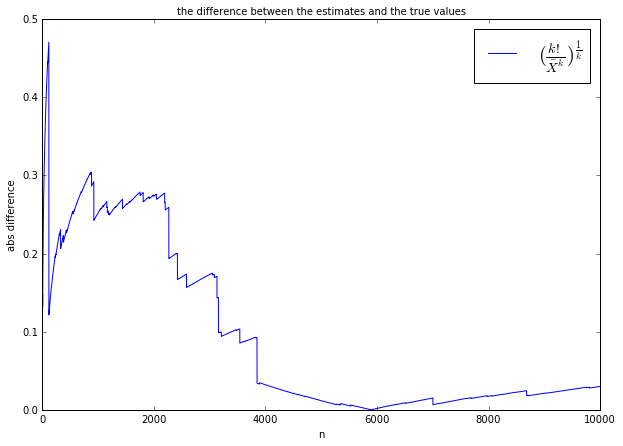

difference in the n-th step: 0.0298680430054


In [27]:
get_estim_plt(1, 10, ylim=0.5)

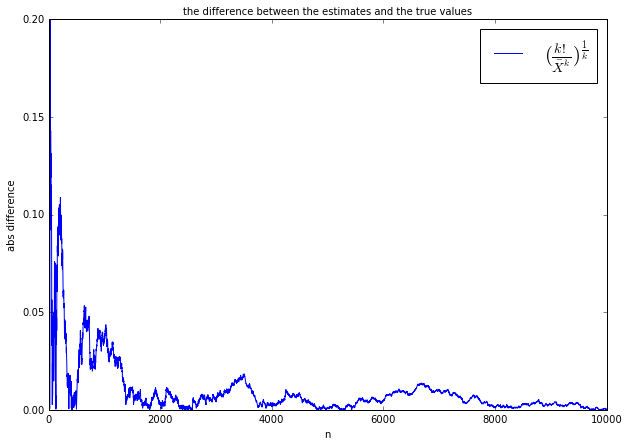

difference in the n-th step: 0.000424117677588


In [28]:
get_estim_plt(1, k=1, ylim=0.2)

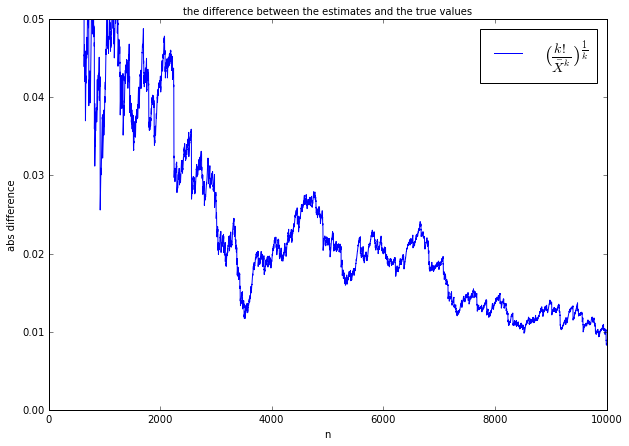

difference in the n-th step: 0.00833508287928


In [29]:
get_estim_plt(1, 2, ylim=0.05)

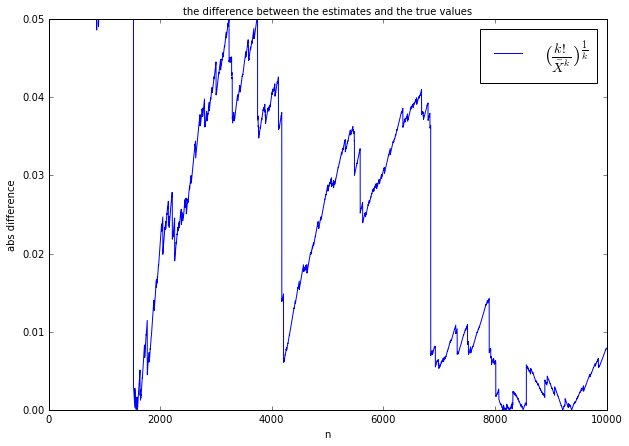

difference in the n-th step: 0.00785606999149


In [30]:
get_estim_plt(1, 5, ylim=0.05)

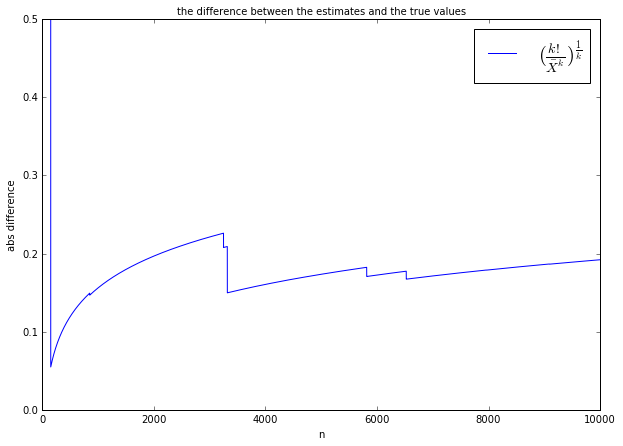

difference in the n-th step: 0.192078125784


In [32]:
get_estim_plt(1, 20, ylim=0.5)

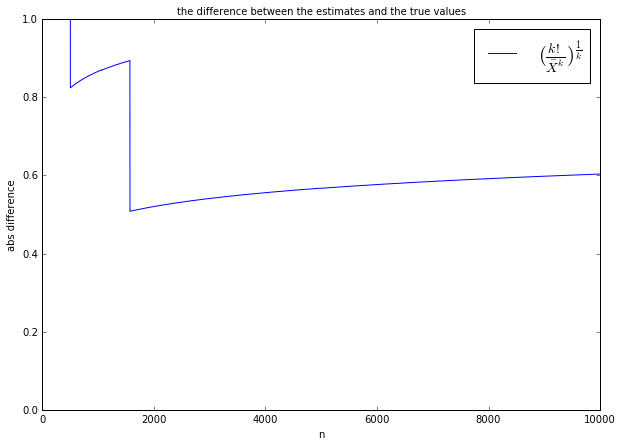

difference in the n-th step: 0.603639206306


In [34]:
get_estim_plt(1, 30, ylim=1)

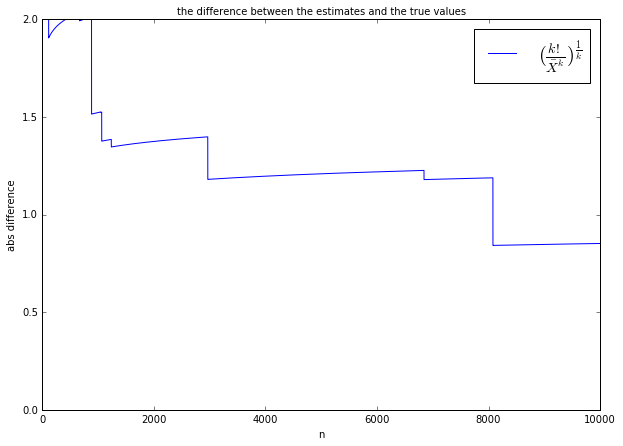

difference in the n-th step: 0.851684983839


In [36]:
get_estim_plt(1, 40, ylim=2)

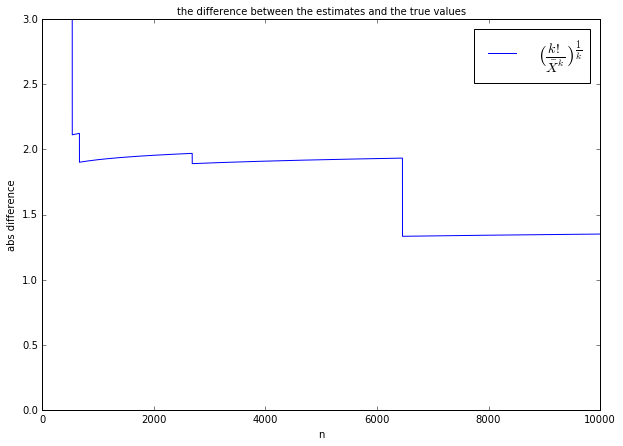

difference in the n-th step: 1.34970338324


In [39]:
get_estim_plt(1, 60, ylim=3)

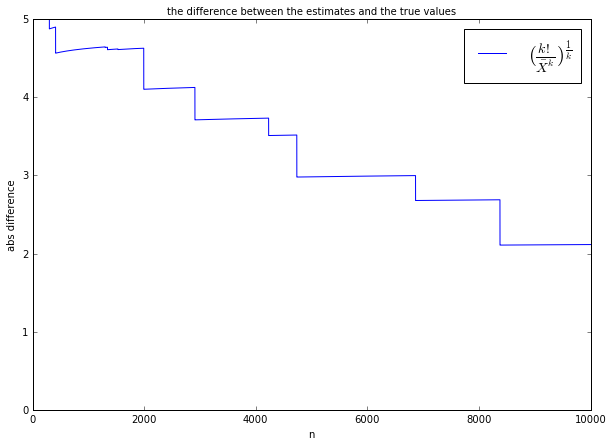

difference in the n-th step: 2.11534173496


In [42]:
get_estim_plt(1, 80, ylim=5)

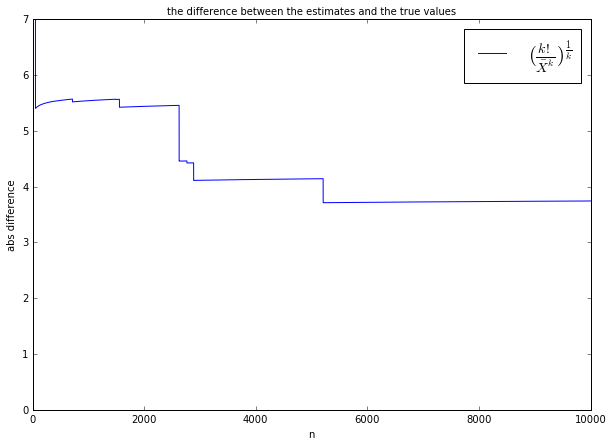

difference in the n-th step: 3.74217620555


In [44]:
get_estim_plt(1, 100, ylim=7)

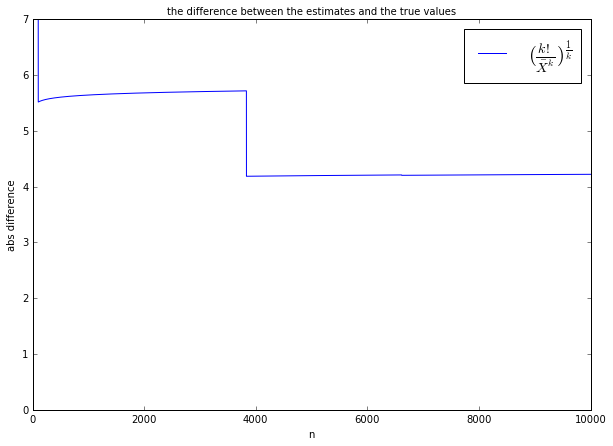

difference in the n-th step: 4.22016363537


In [46]:
get_estim_plt(1, 120, ylim=7)

### Вывод. При малых $k \leq 5$ сходимость видна хорошо, лучше всего при $k=1$, при росте $k$ сходимость наблюдается хуже. Можно сделать предположение, что размера выборки $10^4$ недостаточно для наблюдения сходимости при больших значениях $k$.

### При увеличении $k$ растет ошибка на последнем элементе (при $n = 10^4$).

Проверим верно ли наше предположение о том, что если увеличить размер выборки, то сходимость оценки к $\theta$ будет наблюдаться при больших $k$.

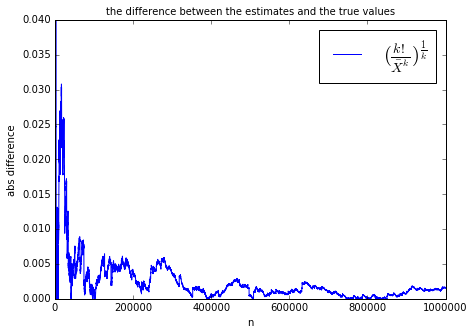

difference in the n-th step: 0.00154266193035


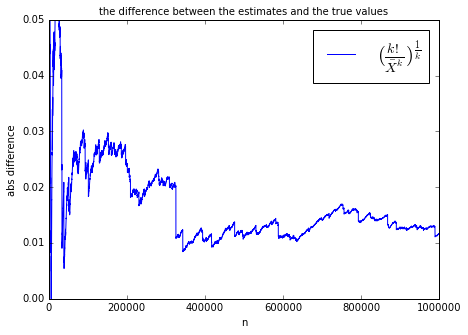

difference in the n-th step: 0.0116692871088


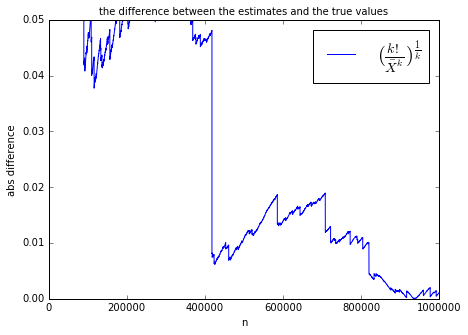

difference in the n-th step: 0.00103994342293


In [16]:
# Строим графики.
get_estim_plt(1, 5, n=10**6, ylim=0.04)
get_estim_plt(1, 7, n=10**6, ylim=0.05)
get_estim_plt(1, 10, n=10**6, ylim=0.05)

#### По графикам заметно что при увеличении выборки сходимость видна лучше.

In [17]:
# Коммент, чтобы он нормально делал PDF.